- [x]  Data Acquisition
- [x]  Exploration Data Analysis 
- [ ]  DATA PREPROCESSING
     + [x] Missing Value Analysis 
     + [x] Feature Engineering
     + [-] Outlier Anaysis / not sure how to do it with catagorical data
- [x]  DATA VISUALIZATION
- [x]  Data Segmentetion with Machine Learning Models
     + [x] scaling
     + [x] segmantation 
     + [x] feature selection
- [x]  Training
- [x]  Evaluation


In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import  accuracy_score
from sklearn.feature_selection import SelectKBest
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_selection import f_classif
from sklearn.model_selection import KFold, cross_val_score,train_test_split
from sklearn import model_selection
import pickle

### Data Acquisition

In [38]:
df = pd.read_csv("dataset.csv")
df.head()

,ptage,ptsex,examtypes,ex_efast,ex_thoracic,ex_abd,ex_cardiac,ex_obgyn,ex_msk,ex_renal,ex_dvt,indications,i1,i2,i3,i4,i5,i6,dxbeforeus,dispobeforeus,dxafterus,dispoafterus,changeindx,changeindispo,changeindxordispo,procedure,ultrasoundfindings,negfast,indeterfast,posfast,peritonealff,pericardialef,tamponade,pleuralef,ptx,pulmedema,nopulmdisease,nocarddysfxn,rvdysfxn,lvdysfxn,cardiacarrest,afib,normalcvp,lowcvp,highcvp,situsinversus,cholelith,cholecystitis,ascites,abdmass,intussuception,aaa,noabdpath,noiup,iup,abortiondemise,ectopic,tissuenl,tissueinfection,tissuefluidcollection,jointeffusion,fracture,distendedbladder,enlargedpros,hydroneph,renalcyst,renalcalculus,renalmass,renalnormal,dvt,nodvt
0,64,F,FAST,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ab pain,3.0,NaN,NaN,NaN,NaN,NaN,Appendicitis,OT,Appendicitis,OT,N,N,N,NaN,No peritoneal free fluid,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,70,M,Abdominal,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,Ab pain,3.0,NaN,NaN,NaN,NaN,NaN,Bowel obstruction,OT,Bowel obstruction,OT,N,N,N,NaN,No ascites,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,59,F,Abdominal; Renal,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,"Ab pain, flank pain; ab pain, flank pain, hema...",3.0,18.0,19.0,NaN,NaN,NaN,Renal mass,Nephrology,Renal mass,Nephrology,N,N,N,NaN,Cholelithiasis w/o sonographic evidence of cho...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
3,17,F,FAST,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Blunt trauma,9.0,NaN,NaN,NaN,NaN,NaN,Visceral injury,OT,No visceral injury,MOI,Y,Y,Y,NaN,No peritoneal free fluid,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,56,M,Cardiac,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,"Dyspnea, fever, orthopnea, cough, edema",16.0,25.0,39.0,40.0,41.0,NaN,Volume overload secondary to AKI,Dialysis,No volume overload,Medical,Y,Y,Y,NaN,Normal intravascular volume,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## data exploration & Analysis

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785 entries, 0 to 784
Data columns (total 71 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ptage                  732 non-null    object 
 1   ptsex                  780 non-null    object 
 2   examtypes              146 non-null    object 
 3   ex_efast               467 non-null    float64
 4   ex_thoracic            64 non-null     float64
 5   ex_abd                 57 non-null     float64
 6   ex_cardiac             215 non-null    float64
 7   ex_obgyn               79 non-null     float64
 8   ex_msk                 10 non-null     float64
 9   ex_renal               39 non-null     float64
 10  ex_dvt                 10 non-null     float64
 11  indications            165 non-null    object 
 12  i1                     723 non-null    float64
 13  i2                     242 non-null    float64
 14  i3                     70 non-null     float64
 15  i4    

In [40]:
df.describe([0.10,0.25,0.50,0.75,0.90,0.95,0.99])

,ex_efast,ex_thoracic,ex_abd,ex_cardiac,ex_obgyn,ex_msk,ex_renal,ex_dvt,i1,i2,i3,i4,i5,i6,negfast,indeterfast,posfast,peritonealff,pericardialef,tamponade,pleuralef,ptx,pulmedema,nopulmdisease,nocarddysfxn,rvdysfxn,lvdysfxn,cardiacarrest,afib,normalcvp,lowcvp,highcvp,situsinversus,cholelith,cholecystitis,ascites,abdmass,intussuception,aaa,noabdpath,noiup,iup,abortiondemise,ectopic,tissuenl,tissueinfection,tissuefluidcollection,jointeffusion,fracture,distendedbladder,enlargedpros,hydroneph,renalcyst,renalcalculus,renalmass,renalnormal,dvt,nodvt
count,467.0,64.0,57.0,215.0,79.0,10.0,39.0,10.0,723.000000,242.000000,70.000000,27.000000,9.000000,1.0,323.0,11.0,118.0,80.000000,77.000000,7.0,57.0,14.0,29.0,13.0,47.0,78.0,100.0,17.0,1.0,1.0,24.0,55.0,1.0,6.0,5.000000,15.000000,7.0,4.0,2.0,8.0,15.0,33.0,9.0,10.0,0.0,5.0,4.0,1.0,2.0,11.0,1.0,23.0,2.0,4.0,3.0,5.0,6.0,3.0
mean,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,12.810512,18.561983,25.742857,32.111111,28.333333,26.0,1.0,1.0,1.0,0.962500,0.987013,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.800000,0.933333,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.409508,13.597286,14.717323,14.900525,10.012492,NaN,0.0,0.0,0.0,0.191182,0.113961,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,NaN,0.0,0.447214,0.258199,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,1.000000,1.000000,0.000000,8.000000,26.0,1.0,1.0,1.0,0.000000,0.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.000000,0.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
10%,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3.000000,3.000000,1.000000,7.800000,17.600000,26.0,1.0,1.0,1.0,1.000000,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.400000,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
25%,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,9.000000,7.000000,16.750000,26.500000,26.000000,26.0,1.0,1.0,1.0,1.000000,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
50%,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,9.000000,16.000000,30.000000,37.000000,30.000000,26.0,1.0,1.0,1.0,1.000000,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
75%,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,16.000000,30.000000,34.750000,39.000000,34.000000,26.0,1.0,1.0,1.0,1.000000,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
90%,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,28.000000,37.000000,39.000000,48.000000,39.400000,26.0,1.0,1.0,1.0,1.000000,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
95%,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,33.000000,41.950000,50.650000,54.700000,40.200000,26.0,1.0,1.0,1.0,1.000000,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [41]:
df.isnull().values.any()

True

In [42]:
df.shape

(785, 71)

In [43]:
df.nunique()

ptage                    105
ptsex                      3
examtypes                 25
ex_efast                   1
ex_thoracic                1
ex_abd                     1
ex_cardiac                 1
ex_obgyn                   1
ex_msk                     1
ex_renal                   1
ex_dvt                     1
indications               98
i1                        35
i2                        38
i3                        24
i4                        17
i5                         8
i6                         1
dxbeforeus               473
dispobeforeus             76
dxafterus                494
dispoafterus              79
changeindx                 3
changeindispo              4
changeindxordispo          3
procedure                 19
ultrasoundfindings       141
negfast                    1
indeterfast                1
posfast                    1
peritonealff               2
pericardialef              2
tamponade                  1
pleuralef                  1
ptx           

## DATA PREPROCESSING

In [44]:
def missing_values_table(dataframe):
    variables_with_na = [col for col in dataframe.columns if dataframe[col].isnull().sum() > 0]
    n_miss = dataframe[variables_with_na].isnull().sum().sort_values(ascending=False)
    ratio = (dataframe[variables_with_na].isnull().sum() / dataframe.shape[0] * 100).sort_values(ascending=False)
    missing_df = pd.concat([n_miss, np.round(ratio, 2)], axis=1, keys=['n_miss', 'ratio'])
    return missing_df
missing_values_table(df)

,n_miss,ratio
tissuenl,785,100.00
enlargedpros,784,99.87
normalcvp,784,99.87
situsinversus,784,99.87
i6,784,99.87
jointeffusion,784,99.87
afib,784,99.87
renalcyst,783,99.75
fracture,783,99.75
aaa,783,99.75


### feature engineering


In [45]:
#fix age types
df["ptage"]=df["ptage"].astype(str)
df["ptage"]=df["ptage"].apply(str.lower)
df["ptage"]=df["ptage"].replace("adult","35")
df["ptage"]=df["ptage"].replace("ad","35")
df["ptage"]=df["ptage"].replace("13 months","1.1")
a=df.loc[df["ptage"].str.contains("-")]
for b in a["ptage"]:
    df["ptage"]=df["ptage"].replace(b,"35")
df["ptage"]=df["ptage"].astype(float)

In [46]:
df["ptsex"]=df["ptsex"].astype(str)
df["ptsex"]=df["ptsex"].apply(str.lower)
df["ptsex"]=df["ptsex"].fillna("f")
df["ptsex"]=df["ptsex"].replace("nan","m")
a=df.loc[df["ptsex"].str.contains("-")]
for b in a["ptsex"]:
    df["ptsex"]=df["ptsex"].replace(b,"m")

In [47]:
#dispoafterus
df["dispoafterus"]=df["dispoafterus"].astype(str)
df["dispoafterus"]=df["dispoafterus"].apply(str.lower)
df["dispoafterus"]=df["dispoafterus"].replace("-",pd.NA)
df["dispoafterus"]=df["dispoafterus"].convert_dtypes().replace("?",pd.NA)
df["dispoafterus"]=df["dispoafterus"].convert_dtypes().replace("<na>", pd.NA)
df["dispoafterus"]=df["dispoafterus"].replace("nan",pd.NA)

In [48]:
df["i1"]=df["i1"].fillna(0)
df["i2"]=df["i2"].fillna(0)
df["i3"]=df["i3"].fillna(0)
df["i4"]=df["i4"].fillna(0)
df["i5"]=df["i5"].fillna(0)
df["i6"]=df["i6"].fillna(0)

In [49]:
#if collumn has 1 unique value allow it to replace nan by false
for column in df.columns:
    if df[column].nunique()==1:
        df[column]=df[column].fillna(0)
df.nunique()
a=df.loc[df["ptsex"].str.contains("-")]
for b in a["ptsex"]:
    df["ptsex"]=df["ptsex"].replace(b,"f")

### OUTLIER ANALYSIS


<Axes: xlabel='ptage', ylabel='examtypes'>

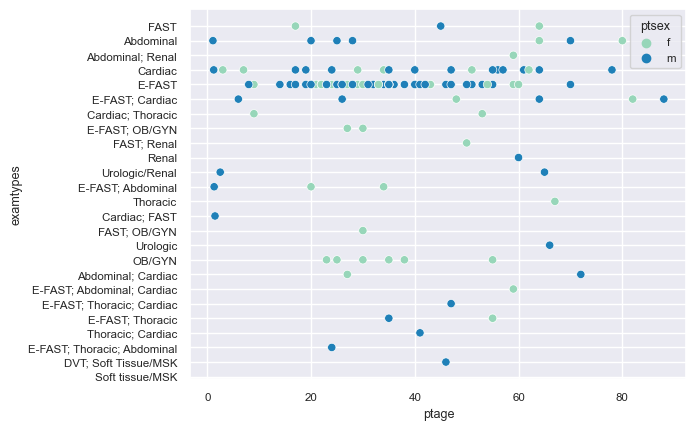

In [50]:
sns.scatterplot(x="ptage",y="examtypes",data =df, hue="ptsex",palette="YlGnBu")

<Axes: xlabel='ptage', ylabel='dispoafterus'>

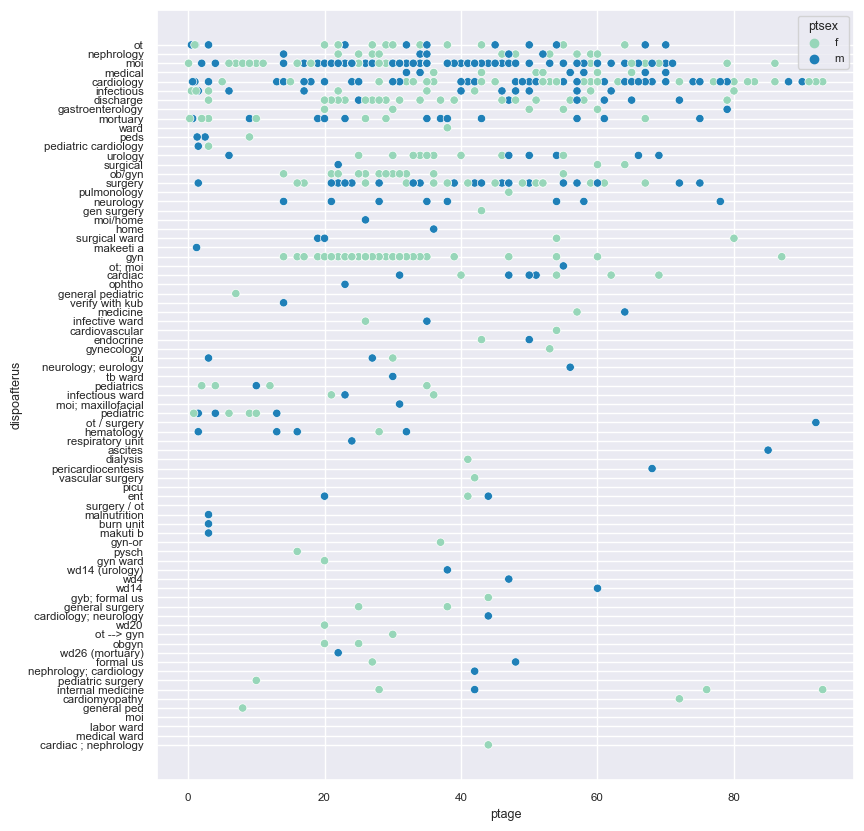

In [51]:
plt.figure(figsize=(9,10))
sns.scatterplot(x="ptage",y="dispoafterus",data =df, hue="ptsex", palette="YlGnBu")


C:\Users\INFORMATICS\AppData\Local\Temp\ipykernel_16028\89661601.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")


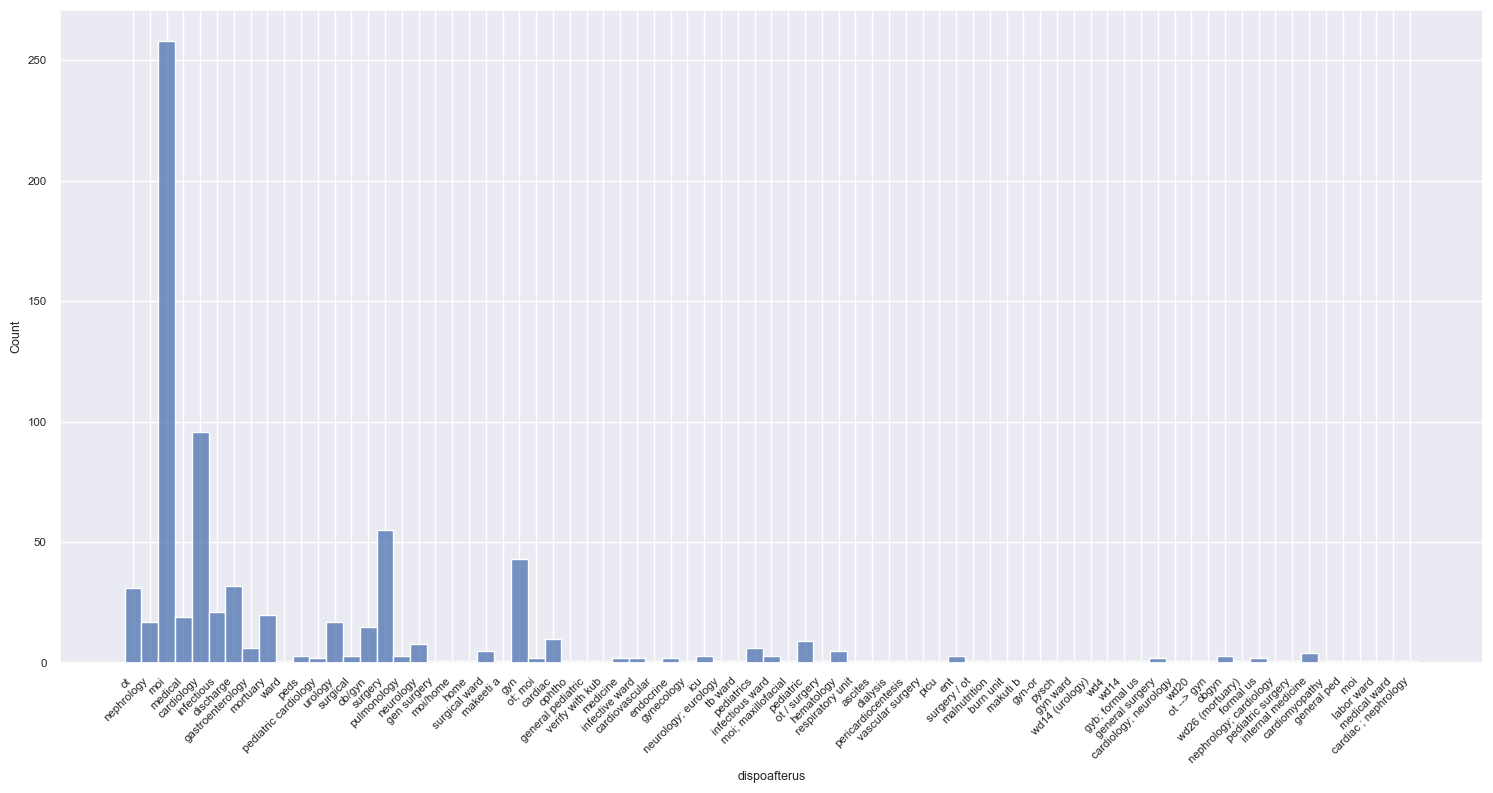

In [52]:
plt.figure(figsize=(15,8))
ax = sns.histplot(x="dispoafterus",data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.tight_layout()
plt.show()
#sns.set(font_scale=.75)


C:\Users\INFORMATICS\AppData\Local\Temp\ipykernel_16028\1141304152.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
C:\Users\INFORMATICS\AppData\Local\Temp\ipykernel_16028\1141304152.py:4: UserWarning: Glyph 65533 (\N{REPLACEMENT CHARACTER}) missing from current font.
  plt.tight_layout()
c:\Users\INFORMATICS\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 65533 (\N{REPLACEMENT CHARACTER}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


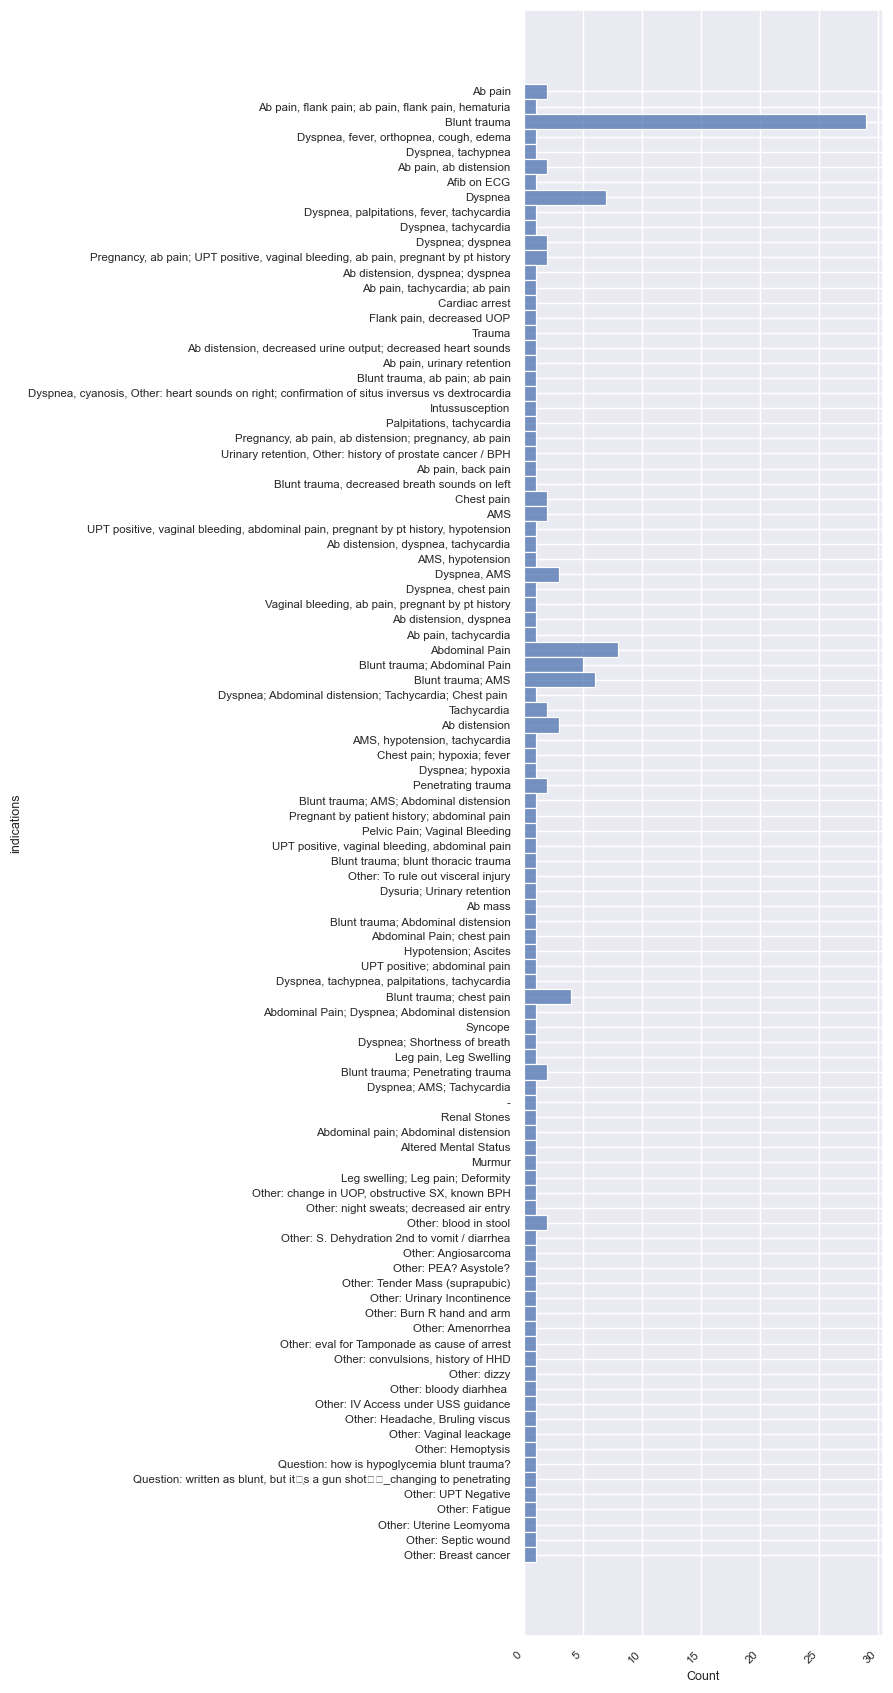

In [53]:
plt.figure(figsize=(9,17))
ax = sns.histplot(y="indications",data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.tight_layout()
plt.show()
sns.set(font_scale=.75)


C:\Users\INFORMATICS\AppData\Local\Temp\ipykernel_16028\2571293227.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")


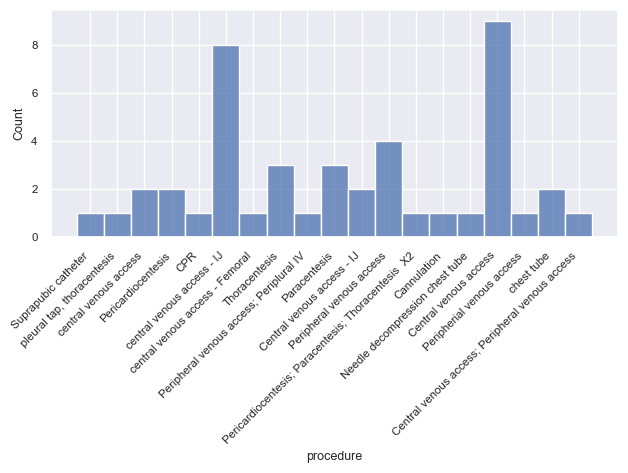

In [54]:
#procedure 
ax = sns.histplot(df["procedure"])
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.tight_layout()
plt.show()


some more feature engineering for sake if it

In [55]:
def segmant(data, collumns):
    total_collumens=pd.DataFrame()
    for column in collumns:

        data.indications=data.indications.astype('str')
        #remeber to exclude quesion
        for ele in data[column]:
            for sec in ele.split(","):
                if "Question" in sec or "?" in sec:
                    data[column]=data[column].str.replace(sec,"nan")

        data[column]=data[column].str.replace("; ",",")
        data[column]=data[column].str.replace(": ",",")
        
        sf=pd.DataFrame()
        values=set()
        for ele in data[column]:
            #creat a data frame add 
            #remeber to exclude quesions and "other"
            #add empty row
            for sec in ele.split(","):
                if not sec=="nan":
                    values.add(sec)
        current_collumens=pd.DataFrame(columns=list(values))
        for index ,row in data.iterrows():
            nrow={}
            for v in values:
                nrow[v]= v in row
            current_collumens.loc[index]=nrow

        total_collumens=pd.concat([total_collumens,current_collumens])
    return total_collumens



In [56]:
perc = 15.0
min_count =  int(((100-perc)/100)*df.shape[1] + 1)
mod_df = df.dropna( axis=0, thresh=min_count)
min_count =  int(((100-perc)/100)*df.shape[0] + 1)
mod_df = df.dropna( axis=1, thresh=min_count)
print(str(df.shape) + ":" +str(mod_df.shape))

(785, 71):(785, 62)


In [57]:

#remove enteries with less than 3 count for each feature
columns_to_reduce=[
     "dispobeforeus", "dispoafterus", "dxafterus"
]
columns_to_remove=[ "examtypes", "ultrasoundfindings","indications"]
#columns_to_segment=["indications"]
#seperate indications into diffenret columns
#exametypes & ultrasoundfindings are already represented in t/f 
data=mod_df.copy()



#reduce
for column in columns_to_reduce:
    unique_values=mod_df[column].unique()
    i= len(unique_values)
    print(column+ " "+str(i)+"/"+ str(df.shape[0]))
    for v in unique_values:
        frequancy=(data[column]==v).sum()
        if frequancy<3:
            index_to_remove=data[data[column]==v].index
            data=data.drop(index_to_remove)
        pass
#segment & concat
#segmanting before reducing costs too much time
#new_columns= segmant(data,columns_to_segment)
#data=pd.concat([data,new_columns], axis=1)
#remove

data=data.drop(columns=columns_to_remove,errors='ignore')

df.shape, data.shape

dispobeforeus 77/785
dispoafterus 78/785
dxafterus 495/785


((785, 71), (266, 62))

In [58]:
# age to categorical
ins=list()
ages=list()
for index,row in data.iterrows():
    age = row["ptage"]
    if data["ptage"].dtype!=float:
        break
    if type(age)==float:
        if age<2:
            ages.append("Infant")
            ins.append(index)
            continue
        if age<13:
            ages.append( "child")
            ins.append(index)

            continue
        if age<18:
            ages.append( "Adolescent")
            ins.append(index)

            continue
        if age<60:
            ages.append("Adult")
            ins.append(index)

            continue
        if age>60:
            ages.append( "Older adult")
            ins.append(index)

            continue
if len(ages)>0:
    age_catagories = pd.Series(ages,index=ins)
    data['ptage']=age_catagories
data.shape, df.shape

((266, 62), (785, 71))

## scaling / encoding

In [59]:
def one_hot_encoder(dataframe, categorical_columns, nan_as_category=False):
    original_columns = list(dataframe.columns)
    dataframe = pd.get_dummies(dataframe, columns=categorical_columns,
                               dummy_na=nan_as_category, drop_first=True)
    new_columns = [col for col in dataframe.columns if col not in original_columns]
    return dataframe, new_columns

def robust_scaler(variable):
    var_median = variable.median()
    quartile1 = variable.quantile(0.05)
    quartile3 = variable.quantile(0.95)
    interquantile_range = quartile3 - quartile1
    if int(interquantile_range) == 0:
        quartile1 = variable.quantile(0.05)
        quartile3 = variable.quantile(0.95)
        interquantile_range = quartile3 - quartile1
        z = (variable - var_median) / interquantile_range
        return round(z, 3)
    else:
        z = (variable - var_median) / interquantile_range
    return round(z, 3)


In [60]:
cols_need_scale=[
     "dispobeforeus", "dispoafterus",
     "ptage","ptsex","dxbeforeus","changeindx","changeindispo",
     "changeindxordispo"
     ]
new_df, one_hot_encodeds = one_hot_encoder(data, cols_need_scale)

In [61]:
one_hot_encodeds

['dispobeforeus_Cardiology',
 'dispobeforeus_Discharge',
 'dispobeforeus_GYN',
 'dispobeforeus_Infectious',
 'dispobeforeus_Infectious Ward',
 'dispobeforeus_Internal Medicine',
 'dispobeforeus_MOI',
 'dispobeforeus_Medical',
 'dispobeforeus_Mortuary',
 'dispobeforeus_Nephrology',
 'dispobeforeus_Neurology',
 'dispobeforeus_OB/GYN',
 'dispobeforeus_OT',
 'dispobeforeus_Pediatric',
 'dispobeforeus_Peds',
 'dispobeforeus_Surgery',
 'dispobeforeus_Surgical Ward',
 'dispobeforeus_Urology',
 'dispoafterus_cardiology',
 'dispoafterus_discharge',
 'dispoafterus_gyn',
 'dispoafterus_hematology',
 'dispoafterus_infectious',
 'dispoafterus_infectious ward',
 'dispoafterus_internal medicine',
 'dispoafterus_medical',
 'dispoafterus_moi',
 'dispoafterus_mortuary',
 'dispoafterus_nephrology',
 'dispoafterus_neurology',
 'dispoafterus_ob/gyn',
 'dispoafterus_ot',
 'dispoafterus_pediatric',
 'dispoafterus_peds',
 'dispoafterus_surgery',
 'dispoafterus_surgical ward',
 'dispoafterus_urology',
 'ptage_

## spliting

In [62]:
new_df = new_df[new_df['dxafterus'].notna()]
X = new_df.drop('dxafterus', axis=1)
y = np.ravel(new_df[['dxafterus']])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 357)

In [63]:

abc =new_df.isnull().sum()
pd.set_option("display.max_rows", None, "display.max_columns", None)
#peritonealff pericardialef
abc

ex_efast                                             0
ex_thoracic                                          0
ex_abd                                               0
ex_cardiac                                           0
ex_obgyn                                             0
ex_msk                                               0
ex_renal                                             0
ex_dvt                                               0
i1                                                   0
i2                                                   0
i3                                                   0
i4                                                   0
i5                                                   0
i6                                                   0
dxafterus                                            0
negfast                                              0
indeterfast                                          0
posfast                                              0
tamponade 

## evaluation

In [64]:
total_info={}

In [65]:
lgr_tuned = LogisticRegression(solver='liblinear',random_state=357).fit(X_train, y_train)
knn_tuned = KNeighborsClassifier().fit(X_train, y_train)
svm_tuned = SVC(random_state=357,gamma='auto').fit(X_train, y_train)
gnb_tuned = GaussianNB().fit(X_train, y_train)
dtc_tuned = DecisionTreeClassifier(random_state=357).fit(X_train, y_train)


In [66]:
models = [("LGR", lgr_tuned),
          ("KNN", knn_tuned),
          ("SVM", svm_tuned),
          ("GNB", gnb_tuned),
          ("DTC", dtc_tuned),
          #("RF", rf_tuned),
          #("LGBM", lgbm_tuned),
          #("XGB", xgb_tuned)
         ]
without_kbest={}
scores=pd.DataFrame()
info=[]
for name, model in models:
    all_results={}
    row={}
    row["model"]=name
    for i in range(30):
        kfold = model_selection.KFold(n_splits=5)
        results = model_selection.cross_validate(estimator=model,X=X,y=y,cv=kfold,scoring=["accuracy", 'f1_weighted','precision_weighted',"recall_weighted",])
        for result in results:
            if result in all_results:
                all_results[result]= np.append(all_results[result],results[result])
            else:
                all_results[result]=results[result]
    row["accuracy"]={"mean":np.mean(all_results["test_accuracy"]),
                     "std":np.std(all_results["test_accuracy"]),
                     "min":np.min(all_results["test_accuracy"]),
                     "max":np.max(all_results["test_accuracy"]),
                      }
    row["f1 score"]={"mean":np.mean(all_results["test_f1_weighted"]),
                     "std":np.std(all_results["test_f1_weighted"]),
                     "min":np.min(all_results["test_f1_weighted"]),
                     "max":np.max(all_results["test_f1_weighted"]),
                      }
    row["precision"]={"mean":np.mean(all_results["test_precision_weighted"]),
                     "std":np.std(all_results["test_precision_weighted"]),
                     "min":np.min(all_results["test_precision_weighted"]),
                     "max":np.max(all_results["test_precision_weighted"]),
                      }
    row["recall"]={"mean":np.mean(all_results["test_recall_weighted"]),
                     "std":np.std(all_results["test_recall_weighted"]),
                     "min":np.min(all_results["test_recall_weighted"]),
                     "max":np.max(all_results["test_recall_weighted"]),
                      }
    info.append(row)
total_info["all features"]=info

c:\Users\INFORMATICS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\INFORMATICS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\INFORMATICS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(res

In [67]:
for model in total_info:
    print(model)

all features


## kbest

In [71]:
select= SelectKBest(score_func=f_classif, k=40)
z= select.fit(X_train,y_train)
X_train_reduced = X_train[[val for i,val in enumerate(X_train.columns) if z.get_support()[i]]]
X_test_reduced = X_test[[val for i,val in enumerate(X_test.columns) if z.get_support()[i]]]

c:\Users\INFORMATICS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [  5   7  13  17  19  26  27  30  32  33  34  36  37  38  40  41  42  43
  45  47  48  49  51  52  61  67  69  80  86  97  98 100 101 102 103 105
 107 108 109 112 117 118 119 120 121 123 125 130 131 132 134 135 136 143
 147 149 150 152 158] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
c:\Users\INFORMATICS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw
c:\Users\INFORMATICS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


In [72]:
lgr_tuned_r = LogisticRegression(solver='liblinear',random_state=357).fit(X_train_reduced, y_train)
knn_tuned_r = KNeighborsClassifier().fit(X_train_reduced, y_train)
svm_tuned_r = SVC(random_state=357,gamma='auto').fit(X_train_reduced, y_train)
gnb_tuned_r = GaussianNB().fit(X_train_reduced, y_train)
dtc_tuned_r = DecisionTreeClassifier(random_state=357).fit(X_train_reduced, y_train)

### kbest evaluation

In [73]:
models_r = [("LGR", lgr_tuned_r),
          ("KNN", knn_tuned_r),
          ("SVM", svm_tuned_r),
          ("GNB", gnb_tuned_r),
          ("DTC", dtc_tuned_r),
          #("RF", rf_tuned),
          #("LGBM", lgbm_tuned),
          #("XGB", xgb_tuned)
         ]
with_kbest={}
info=[]

for name, model in models_r:
    all_results={}
    row={}
    row["model"]=name
    for i in range(30):
        kfold = model_selection.KFold(n_splits=5)
        results = model_selection.cross_validate(estimator=model,X=X,y=y,cv=kfold,scoring=["accuracy", 'f1_weighted','precision_weighted',"recall_weighted",])
        for result in results:
            if result in all_results:
                all_results[result]= np.append(all_results[result],results[result])
            else:
                all_results[result]=results[result]
    row["accuracy"]={"mean":np.mean(all_results["test_accuracy"]),
                     "std":np.std(all_results["test_accuracy"]),
                     "min":np.min(all_results["test_accuracy"]),
                     "max":np.max(all_results["test_accuracy"]),
                      }
    row["f1 score"]={"mean":np.mean(all_results["test_f1_weighted"]),
                     "std":np.std(all_results["test_f1_weighted"]),
                     "min":np.min(all_results["test_f1_weighted"]),
                     "max":np.max(all_results["test_f1_weighted"]),
                      }
    row["precision"]={"mean":np.mean(all_results["test_precision_weighted"]),
                     "std":np.std(all_results["test_precision_weighted"]),
                     "min":np.min(all_results["test_precision_weighted"]),
                     "max":np.max(all_results["test_precision_weighted"]),
                      }
    row["recall"]={"mean":np.mean(all_results["test_recall_weighted"]),
                     "std":np.std(all_results["test_recall_weighted"]),
                     "min":np.min(all_results["test_recall_weighted"]),
                     "max":np.max(all_results["test_recall_weighted"]),
                      }
    info.append(row)
total_info["kbest (40)"]=info


c:\Users\INFORMATICS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\INFORMATICS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\INFORMATICS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(res

In [79]:
pickle.dump(total_info,open("dataaaaa.pkl","wb"))


In [75]:
# prediction of new case
xtest=X_test_reduced.iloc[1]
xtest['ex_cardiac']=1
xtest['lvdysfxn']=1

xtest=pd.DataFrame(xtest)
xtest1=xtest.T
for name, model in  models_r:
    y_pred = model.predict(xtest1)
    print(y_pred)

['Pneumonia']
['Pneumonia']
['CCF']
['Pneumonia']
['CKD']


C:\Users\INFORMATICS\AppData\Local\Temp\ipykernel_16028\1539566201.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  xtest['ex_cardiac']=1
C:\Users\INFORMATICS\AppData\Local\Temp\ipykernel_16028\1539566201.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  xtest['lvdysfxn']=1


### k fold evaluation

In [76]:
cv = KFold(n_splits=5,shuffle=False)
for name, model in models:
    scores = cross_val_score(model, X, y, cv = 5, scoring = 'accuracy')
    print(name,":\n",'kfloding accuracy=',scores)
    print('mean accuracy=',np.mean(scores))
    print('standard variation=',np.std(scores))

c:\Users\INFORMATICS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\INFORMATICS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\INFORMATICS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\INFORMATICS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


LGR :
 kfloding accuracy= [0.59183673 0.66666667 0.625      0.64583333 0.70833333]
mean accuracy= 0.6475340136054422
standard variation= 0.03918029263098053
KNN :
 kfloding accuracy= [0.30612245 0.47916667 0.52083333 0.52083333 0.4375    ]
mean accuracy= 0.4528911564625851
standard variation= 0.07962489865091332
SVM :
 kfloding accuracy= [0.18367347 0.25       0.29166667 0.25       0.27083333]
mean accuracy= 0.249234693877551
standard variation= 0.036239257952228154
GNB :
 kfloding accuracy= [0.44897959 0.6875     0.54166667 0.52083333 0.45833333]
mean accuracy= 0.5314625850340137
standard variation= 0.08569260267261522
DTC :
 kfloding accuracy= [0.71428571 0.72916667 0.83333333 0.8125     0.625     ]
mean accuracy= 0.7428571428571429
standard variation= 0.0747397222171551


c:\Users\INFORMATICS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


In [77]:
kfold_acc={}
for name, model in models_r:
    scores = cross_val_score(model, X, y, cv = 5, scoring = 'accuracy')
    print(name,":\n",'kfloding accuracy=',scores)
    print('mean accuracy=',np.mean(scores))
    print('standard deviation=',np.std(scores))
    kfold_acc[name]=np.mean(scores)

c:\Users\INFORMATICS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


LGR :
 kfloding accuracy= [0.59183673 0.66666667 0.625      0.64583333 0.70833333]
mean accuracy= 0.6475340136054422
standard deviation= 0.03918029263098053
KNN :
 kfloding accuracy= [0.30612245 0.47916667 0.52083333 0.52083333 0.4375    ]
mean accuracy= 0.4528911564625851
standard deviation= 0.07962489865091332
SVM :
 kfloding accuracy= [0.18367347 0.25       0.29166667 0.25       0.27083333]
mean accuracy= 0.249234693877551
standard deviation= 0.036239257952228154


c:\Users\INFORMATICS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\INFORMATICS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\INFORMATICS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


GNB :
 kfloding accuracy= [0.44897959 0.6875     0.54166667 0.52083333 0.45833333]
mean accuracy= 0.5314625850340137
standard deviation= 0.08569260267261522
DTC :
 kfloding accuracy= [0.71428571 0.72916667 0.83333333 0.8125     0.625     ]
mean accuracy= 0.7428571428571429
standard deviation= 0.0747397222171551


c:\Users\INFORMATICS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


In [78]:
print("model   Kbest   Kbest+kfold")
for model  in with_kbest:
    msg= "%s: (%f) (%f)" % (model, with_kbest[model],kfold_acc[model])
    print(msg)
# the k fold scores for KNN SVM & GNB scores found in the kbest selected dataset are a lower compared to the
#previous evaluation method while the LGR & DTC seem to have regained their accuracy

model   Kbest   Kbest+kfold
